In [104]:
from scipy.optimize import linprog
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt


- Run your code (or tool) on the example LP problem instance from lecture slides on Simplex (LECTURE-5-and more-2018) (n=4, m=2)
- We will next try to increase the number of variables (n) and increase the number of constraints (m), thus
- Fixing m=2:
•	Rerun the code for the following values of n = [4, 10, 20, 30, 40, 50]. (in increments of 10) AND
- For each of the n values above:
•	Rerun the code for the following values of m = [2, 6, 10, 14] (in increments of 4, just manually/randomly create additional constraints)
- In total, you will test 6 * 4 = 24 total combinations.


m = 4, n = 2

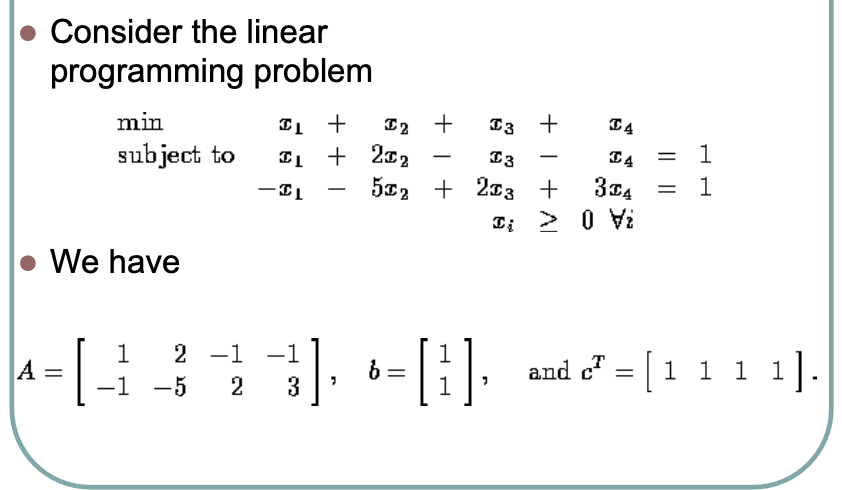


In [105]:
c = [1, 1, 1, 1]
#minimum objective function

In [106]:
#constraints
A_eq = [[1, 2, -1, -1], 
     [-1, -5, 2, 3]]


In [107]:
b_eq = [1, 1]

I dont want my answer to be 0 so this constraint for A_eq and B_eq wont allow me to get 0. since 0 is a min if i leave it as a option

In [108]:
bounds = [(0, None)] * 4  

start_time = time.time()

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

end_time = time.time()
time_taken = end_time - start_time

print(f"Optimal Value (zmin): {result.fun}")
print(f"Optimal Solution (x): {result.x}")
print(f"Message: {result.message}")
print(f"Number of iterations: {result.nit}")
print(f"Time taken: {time_taken:.4f} seconds")


Optimal Value (zmin): 3.0
Optimal Solution (x): [2. 0. 0. 1.]
Message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Number of iterations: 3
Time taken: 0.0015 seconds


In [109]:

# List to store results
results = []

# Hardcoded constraints for n
def hardcoded_constraints_m2(n):
    if n == 4:
        A_eq = [[1, 2, -1, -1],
                [-1, -5, 2, 3]]
        b_eq = [1, 1]
    elif n == 10:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    elif n == 20:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1]]
        b_eq = [1, 1]
    elif n == 30:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1]]
        b_eq = [1, 1]
    elif n == 40:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    elif n == 50:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    return A_eq, b_eq

# Hardcoded constraints for M
def hardcoded_constraints_new_m(n, m):
    # Initialize an empty list for constraints
    A_eq = []
    b_eq = []

    # Base constraints for M = 2 (always include these)
    base_constraints = [
        [1, 2, -1, -1] + [0] * (n - 4),
        [-1, -5, 2, 3] + [0] * (n - 4)
    ]
    A_eq.extend(base_constraints)
    b_eq.extend([1, 1])

    # Add more constraints based on the value of M
    if m >= 6:
        # Adding 4 new constraints for M = 6
        A_eq.extend([
            [2, -1, 1, 0] + [1, -1] * ((n - 4) // 2),  # Example pattern for extra constraints
            [1, 3, -1, -2] + [-1, 2] * ((n - 4) // 2),
            [-2, 4, 0, 1] + [2, -3] * ((n - 4) // 2),
            [3, -3, 1, 2] + [-1, 4] * ((n - 4) // 2)
        ])
        b_eq.extend([2, 3, 1, 2])

    if m >= 10:
        # Adding 4 more constraints for M = 10
        A_eq.extend([
            [1, 1, 1, -1] + [3, -1] * ((n - 4) // 2),
            [-1, 2, -2, 3] + [1, 2] * ((n - 4) // 2),
            [2, -3, 1, 1] + [-2, 3] * ((n - 4) // 2),
            [0, 4, -2, 0] + [2, -2] * ((n - 4) // 2)
        ])
        b_eq.extend([3, 4, 1, 2])

    if m >= 14:
        # Adding 4 more constraints for M = 14
        A_eq.extend([
            [-2, 1, 3, -4] + [-1, 2] * ((n - 4) // 2),
            [3, -2, 0, 1] + [4, -3] * ((n - 4) // 2),
            [4, 1, -1, 2] + [1, -2] * ((n - 4) // 2),
            [-3, -1, 2, 0] + [3, 1] * ((n - 4) // 2)
        ])
        b_eq.extend([2, 3, 1, 2])

    return A_eq, b_eq

# Define the range of N and M values
n_values = [4, 10, 20, 30, 40, 50]
m_values = [2, 6, 10, 14]

# Loop over N and M
for n in n_values:
    # First, run with M = 2 with fixed constraints
    A_eq, b_eq = hardcoded_constraints_m2(n)
    c = [1] * n  # Objective function
    bounds = [(0, None)] * n  # Non-negative bounds
    start_time = time.time()
    result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    end_time = time.time()

    # Store results
    results.append({
        'n': n,
        'm': 2,
        'status': result.status,
        'objective_value': result.fun if result.success else None,
        'time': end_time - start_time,
        'iterations': result.nit,
        'solution': result.x if result.success else None,
        'message': result.message
    })

    # Now, for each N, run with new M values (6, 10, 14)
    for m in m_values[1:]:
        A_eq, b_eq = hardcoded_constraints_new_m(n, m)
        start_time = time.time()
        result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
        end_time = time.time()

        # Store results
        results.append({
            'n': n,
            'm': m,
            'status': result.status,
            'objective_value': result.fun if result.success else None,
            'time': end_time - start_time,
            'iterations': result.nit,
            'solution': result.x if result.success else None,
            'message': result.message
        })

# Print results
for res in results:
    print(res)


{'n': 4, 'm': 2, 'status': 0, 'objective_value': 3.0, 'time': 0.001110076904296875, 'iterations': 3, 'solution': array([2., 0., 0., 1.]), 'message': 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'}
{'n': 4, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.001489877700805664, 'iterations': 3, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 4, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.0009050369262695312, 'iterations': 0, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 4, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.0008358955383300781, 'iterations': 0, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 10, 'm': 2, 'status': 0, 'objective_val